In [103]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [117]:
with open("C:\\Users\\ACER\\Desktop\\Python\\sample.json","r",encoding="utf-8") as f:
    data = json.load(f)
    

In [118]:
questions = data["questions"]

In [119]:
embeddings= np.array([q["embedding"] for q in questions])

In [120]:
norms = np.linalg.norm(embeddings, axis=1, keepdims= True)

In [121]:
embeddings_normalized = embeddings/ norms

In [122]:
from sklearn.cluster import KMeans

In [123]:
K=20

In [124]:
kmeans=KMeans(
    n_clusters=K,
    random_state=42,
    n_init=10)

In [125]:
cluster_ids = kmeans.fit_predict(embeddings_normalized)

In [126]:
for i,q in enumerate(questions):
    q["cluster_ids"]=int(cluster_ids[i])


In [127]:
# PCA to 2D
pca = PCA(n_components=2, random_state=42)
embeddings_2d = pca.fit_transform(embeddings_normalized)

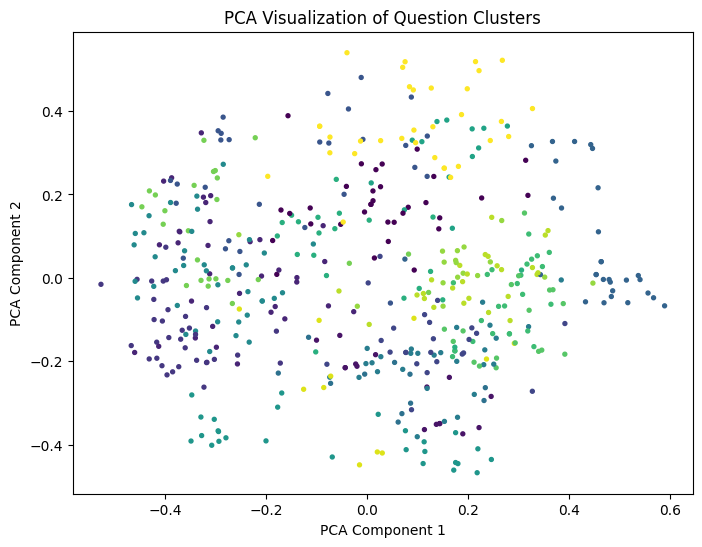

In [128]:
# Plot (no manual colors set)
plt.figure(figsize=(8, 6))
plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=cluster_ids,
    s=8
)
plt.title("PCA Visualization of Question Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [141]:
cluster_id_tocheck = 0

cluster_0_questions = [
    q for q in questions if q["cluster_ids"] == cluster_id_tocheck
]


In [142]:
for i,q in enumerate(cluster_0_questions[:125]):
    print(f"{i+1}. ({q['year']}) {q['cleaned_text']}")

1. (None) explain about input and output function available in c with syntax and example of each part
2. (None) list down the rules for writing identifiers in c
3. (None) define operator and keyword in c
4. (None) differentiate between do loop and while loop in c
5. (None) write a program to demonstrate the use of `.` and `->` operator in structure
6. (None) discuss about compilation process in c
7. (None) explain about toupper() and tolower() function used in c
8. (None) what are the fundamental data types in c
9. (None) define tokens in c programming language
10. (None) write a syntax of function declaration function definition and function call in c programming
11. (None) can a main function be called recursively in c justify
12. (None) write short note on associativity in c
13. (None) explain ternary operator in c with an example
14. (None) why is it necessary in c programming
15. (None) why are formatted output important in c language
16. (None) explain how a structure can be defi